In [262]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyreadr 
import pyreadr

In [263]:
df = pyreadr.read_r("stroke_data.RData")

In [264]:
df["VC_preds"]

,VC_preds
0,CALCVol
1,CALCVolProp
2,MATXVol
3,MATXVolProp
4,LRNCVol
5,LRNCVolProp
6,MaxCALCArea
7,MaxCALCAreaProp
8,MaxDilationByArea
9,MaxMATXArea


In [265]:
df_train = df["stroke_train"]
df_test = df["stroke_test"]

In [266]:
df_all = pd.concat([df_train, df_test], axis=0)

In [267]:
df_train.describe()

,NASCET,CALCVol,CALCVolProp,MATXVol,MATXVolProp,LRNCVol,LRNCVolProp,MaxCALCArea,MaxCALCAreaProp,MaxDilationByArea,...,WallVol,MaxStenosisByDiameter,age,sex,SmokingHistory,AtrialFibrillation,CoronaryArteryDisease,DiabetesHistory,HypercholesterolemiaHistory,HypertensionHistory
count,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,...,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000
mean,0.393258,218.997675,0.079780,3074.590206,0.770150,372.801329,0.110393,21.385276,0.356120,495.424724,...,4157.792228,65.552294,71.539326,0.561798,0.617978,0.112360,0.280899,0.247191,0.561798,0.797753
std,0.491241,241.698257,0.069641,784.564506,0.060299,298.844728,0.076860,14.264692,0.176473,987.506703,...,1124.534739,23.957712,10.544339,0.498978,0.488635,0.317598,0.451985,0.433823,0.498978,0.403951
min,0.000000,4.017739,0.002714,939.336039,0.475414,15.660317,0.008879,1.754366,0.007363,16.266444,...,1416.747628,10.544113,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,76.278143,0.030736,2484.136114,0.747762,174.906701,0.054362,10.907509,0.240941,82.810036,...,3404.328027,49.297050,65.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,152.032386,0.066057,3106.593412,0.773184,293.269922,0.093313,17.583561,0.335161,149.251841,...,4090.940094,63.496170,72.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,1.000000,265.237744,0.096992,3608.960417,0.808272,486.201224,0.142522,27.587819,0.442642,367.932223,...,5136.800995,83.172397,80.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,1517.538951,0.439619,4821.517819,0.869634,1612.404513,0.494590,63.350869,0.957643,5920.628363,...,6306.808224,100.000000,90.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [268]:
import scipy.stats as stats

In [269]:
df_all["Stroke"] = df_all["Stroke"].apply(lambda x: 1 if x == "Y" else 0)
df_all["Stroke"].value_counts()

1    64
0    62
Name: Stroke, dtype: int64

In [270]:
crosstab = pd.crosstab(df_all["Stroke"], df_all["NASCET"])
stat, p, dof, expected = stats.chi2_contingency(crosstab)

In [272]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   Stroke                       89 non-null     category
 1   NASCET                       89 non-null     float64 
 2   CALCVol                      89 non-null     float64 
 3   CALCVolProp                  89 non-null     float64 
 4   MATXVol                      89 non-null     float64 
 5   MATXVolProp                  89 non-null     float64 
 6   LRNCVol                      89 non-null     float64 
 7   LRNCVolProp                  89 non-null     float64 
 8   MaxCALCArea                  89 non-null     float64 
 9   MaxCALCAreaProp              89 non-null     float64 
 10  MaxDilationByArea            89 non-null     float64 
 11  MaxMATXArea                  89 non-null     float64 
 12  MaxMATXAreaProp              89 non-null     float64 
 13  MaxLRNC

In [273]:
for col in df_all.columns:
    print(col, df_all[col].isnull().sum())

Stroke 0
NASCET 0
CALCVol 0
CALCVolProp 0
MATXVol 0
MATXVolProp 0
LRNCVol 0
LRNCVolProp 0
MaxCALCArea 0
MaxCALCAreaProp 0
MaxDilationByArea 0
MaxMATXArea 0
MaxMATXAreaProp 0
MaxLRNCArea 0
MaxLRNCAreaProp 0
MaxMaxWallThickness 0
MaxRemodelingRatio 0
MaxStenosisByArea 0
MaxWallArea 0
WallVol 0
MaxStenosisByDiameter 0
age 0
sex 0
SmokingHistory 0
AtrialFibrillation 0
CoronaryArteryDisease 0
DiabetesHistory 0
HypercholesterolemiaHistory 0
HypertensionHistory 0


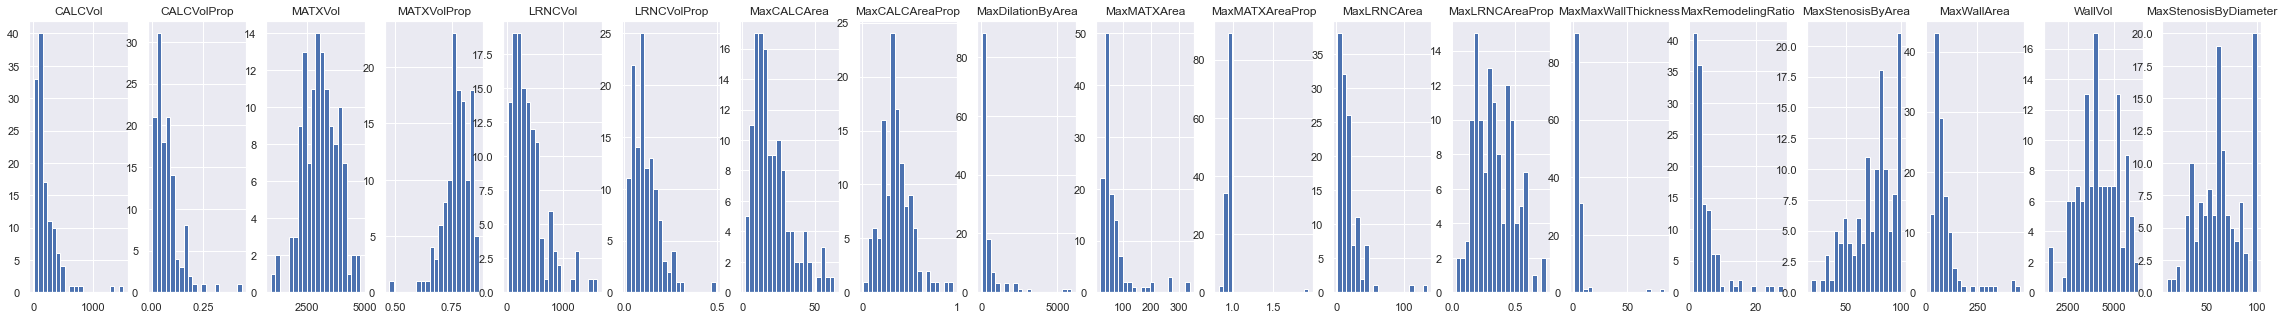

In [274]:
fig, axis = plt.subplots(1,len(df["VC_preds"]["VC_preds"]), figsize=(40,5))
for i, k in enumerate(df["VC_preds"]["VC_preds"]):
    axis[i].hist(df_all[k], bins=20)
    axis[i].set_title(k)

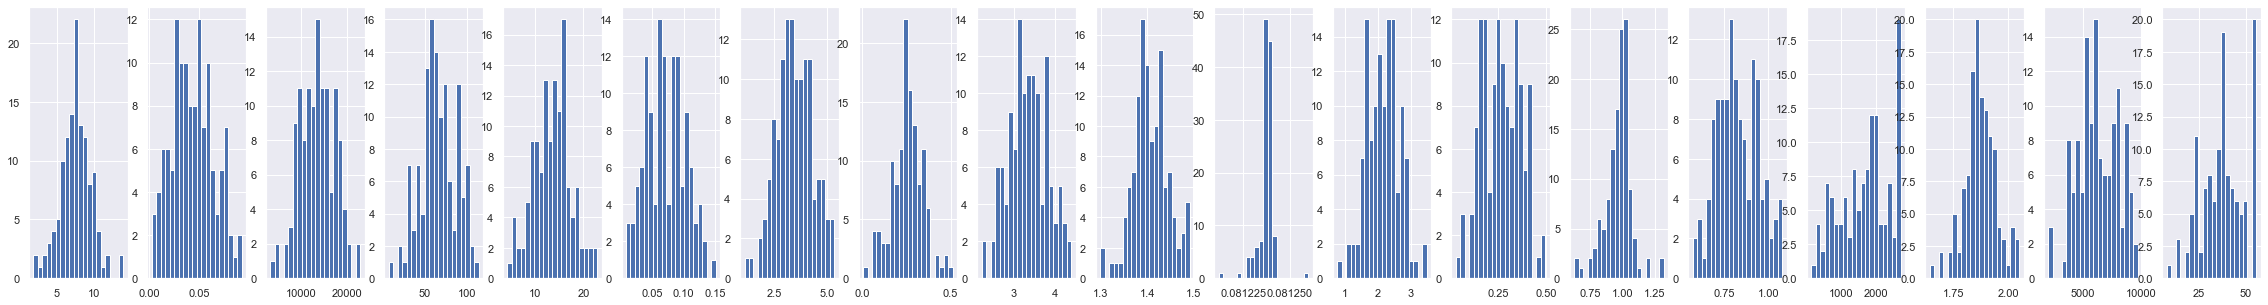

In [275]:
fig, axis = plt.subplots(1,len(df["VC_preds"]["VC_preds"]), figsize=(40,5))
for i, k in enumerate(df["VC_preds"]["VC_preds"]):
    xt, lmbda = stats.yeojohnson(df_all[k])
    df_all[k] = xt
    axis[i].hist(df_all[k], bins=20)


<AxesSubplot:>

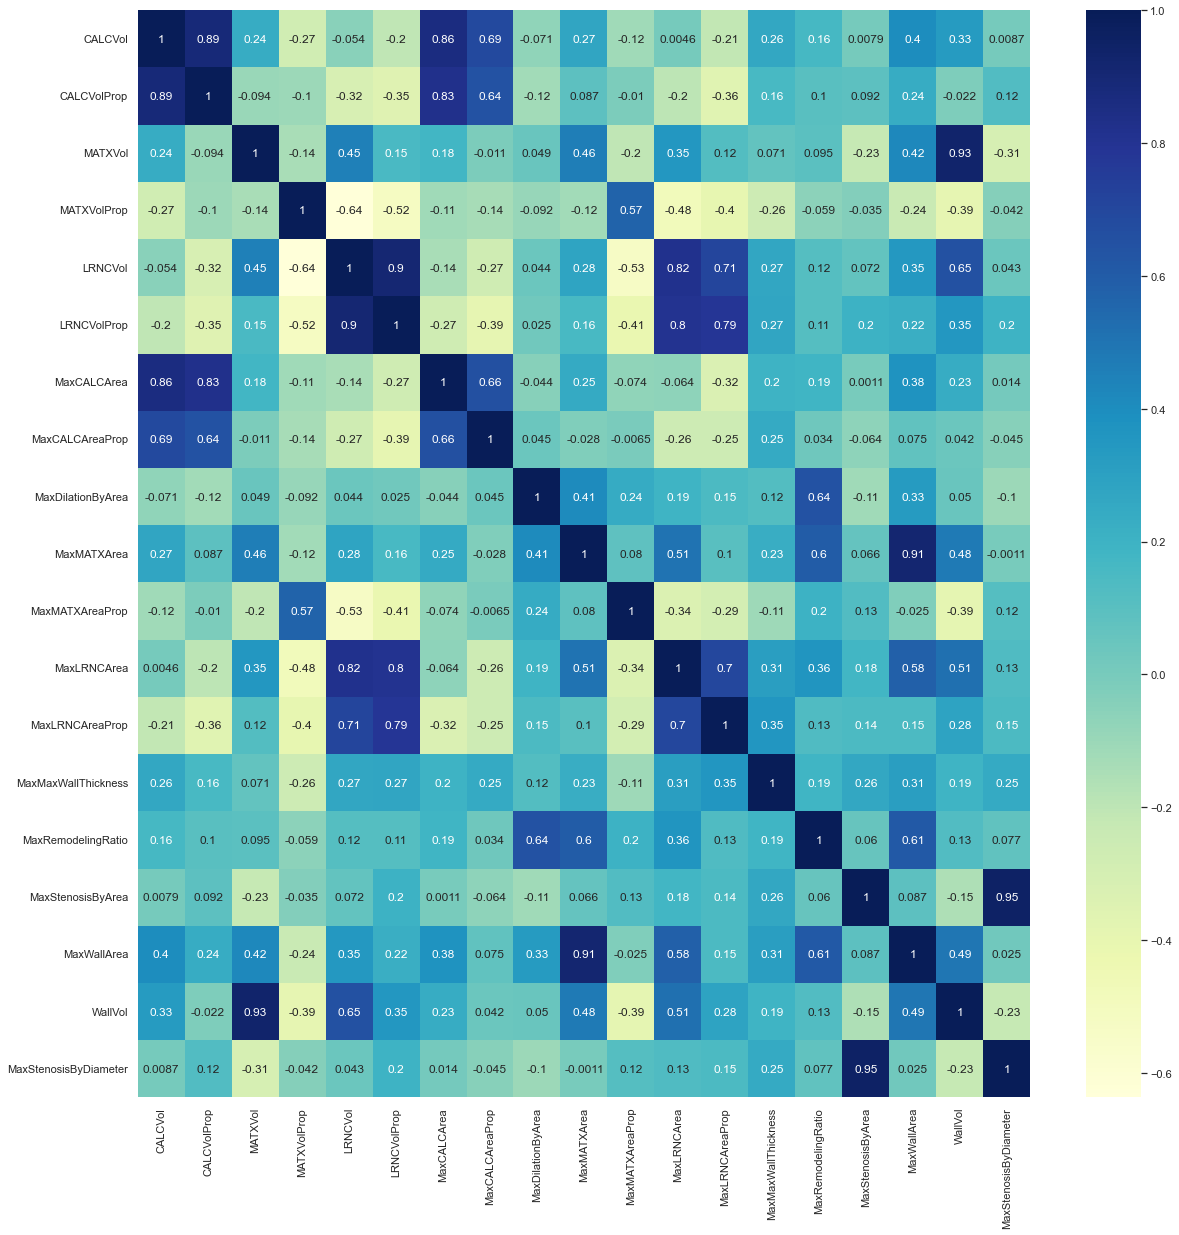

In [276]:
sns.set(rc={'figure.figsize':(20,20)})
sns.heatmap(df_all[df["VC_preds"]["VC_preds"]].corr(), cmap="YlGnBu", annot=True)

In [277]:
df_all.drop(["WallVol", "MaxWallArea", "MaxStenosisByArea"], axis=1, inplace=True)

In [278]:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_all.drop(['Stroke'], axis = 1), df_all["Stroke"], test_size=0.3,shuffle = False)
X_train.head()

,NASCET,CALCVol,CALCVolProp,MATXVol,MATXVolProp,LRNCVol,LRNCVolProp,MaxCALCArea,MaxCALCAreaProp,MaxDilationByArea,...,MaxRemodelingRatio,MaxStenosisByDiameter,age,sex,SmokingHistory,AtrialFibrillation,CoronaryArteryDisease,DiabetesHistory,HypercholesterolemiaHistory,HypertensionHistory
0,0.0,8.711336,0.048605,13788.855129,56.902142,12.080549,0.067774,3.020847,0.274012,3.768536,...,0.924765,8.053072,72,1,1,0,0,0,0,1
1,0.0,4.648076,0.014756,13138.522504,80.175051,14.287672,0.088097,2.370813,0.176924,3.106190,...,0.668992,13.232099,76,1,1,0,0,1,1,1
2,0.0,7.076787,0.030901,17437.125305,65.867703,13.643128,0.063301,3.374584,0.297540,3.542308,...,0.788946,13.897898,72,0,0,0,0,0,0,0
3,0.0,11.857679,0.082627,15717.719277,57.323635,10.234751,0.028736,5.346735,0.377695,4.191721,...,1.042911,14.233939,61,1,1,0,0,1,1,1
4,0.0,6.461066,0.033009,12916.370696,53.266197,13.230606,0.058834,3.475503,0.248347,3.122342,...,0.693490,30.472945,65,1,0,0,0,0,0,1


In [279]:
from sklearn.metrics import RocCurveDisplay, roc_curve, auc

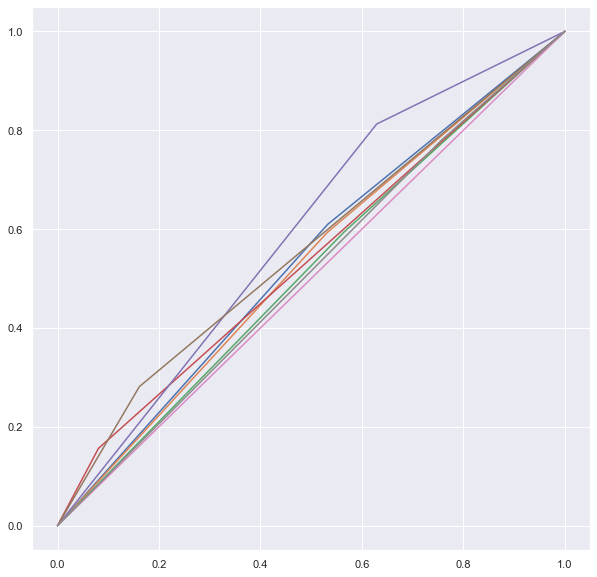

In [280]:
plt.figure(figsize=(10, 10))
roc_risk = {}
for col in df["risk_preds"]["risk_preds"]:
    clf = LogisticRegression().fit(np.array(df_all[col]).reshape(-1, 1), np.array(df_all["Stroke"]))
    y_pred = clf.predict(np.array(df_all[col]).reshape(-1, 1))
    fpr, tpr, thresholds = roc_curve(df_all["Stroke"], y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    roc_risk[col] = roc_auc

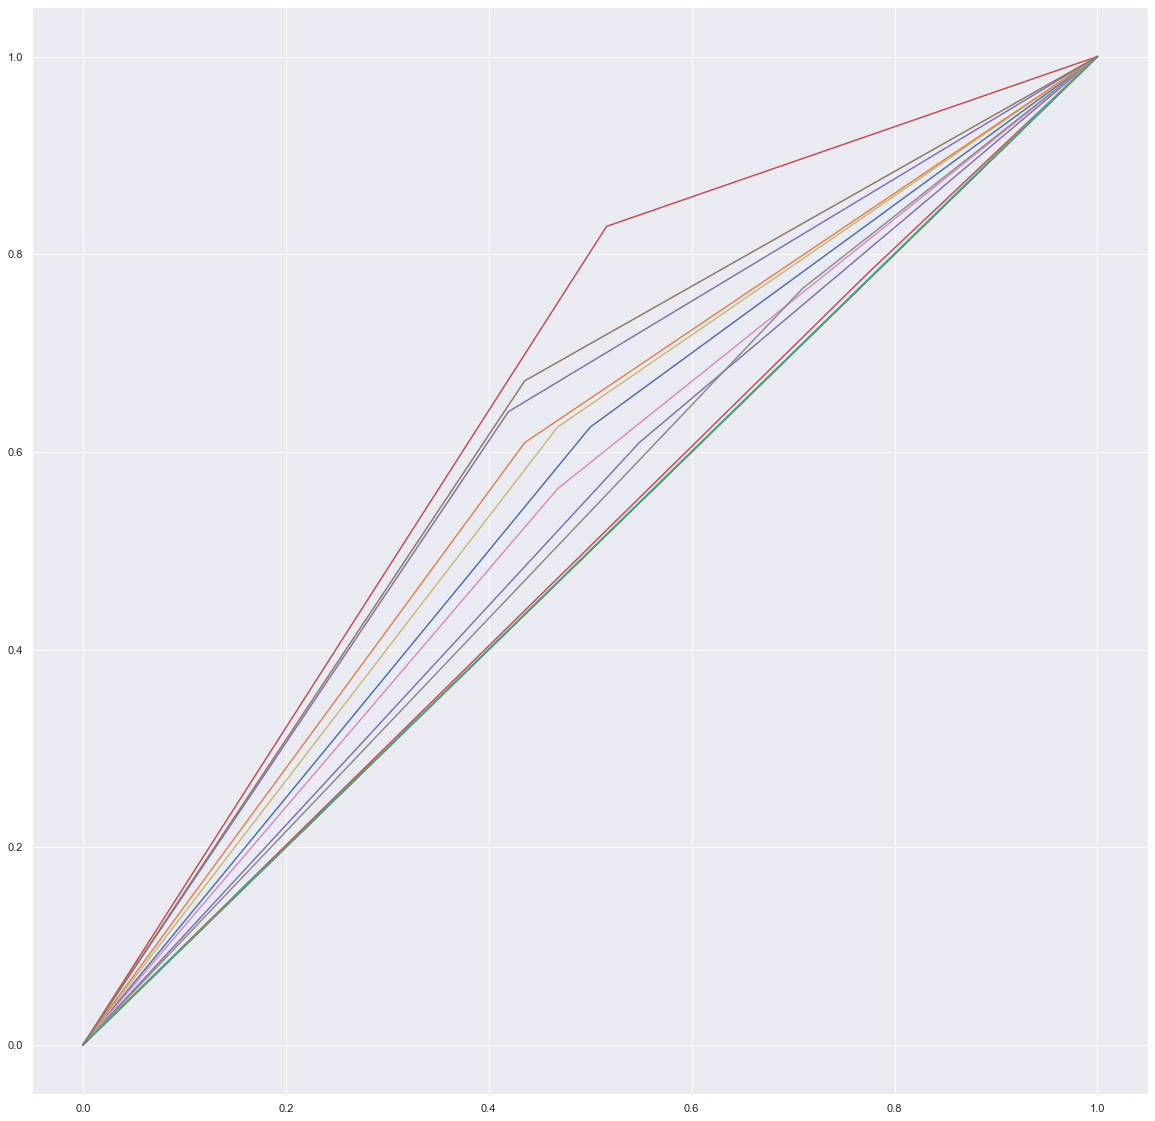

In [281]:
roc_vc = {}
for col in df["VC_preds"]["VC_preds"]:
    if col not in df_all.columns:
        continue
    clf = LogisticRegression().fit(np.array(df_all[col]).reshape(-1, 1), np.array(df_all["Stroke"]))
    y_pred = clf.predict(np.array(df_all[col]).reshape(-1, 1))
    fpr, tpr, thresholds = roc_curve(df_all["Stroke"], y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    roc_vc[col] = roc_auc

In [282]:
all_combinations = []
for i in df["VC_preds"]["VC_preds"]:
    for j in df["VC_preds"]["VC_preds"]:
        if i == j:
            continue
        if [j, i] in all_combinations:
            continue
        all_combinations.append([i, j])
for i in df["risk_preds"]["risk_preds"]:
    for j in df["risk_preds"]["risk_preds"]:
        if i == j:
            continue
        if [j, i] in all_combinations:
            continue
        all_combinations.append([i, j])

In [ ]:
df_pairs = pd.DataFrame({})
for i in all_combinations:
    if i[0] not in df_all.columns or i[1] not in df_all.columns:
        continue
    col_name = "_".join(i)
    df_pairs[col_name] = df_all[i[0]] * df_all[i[1]]
    

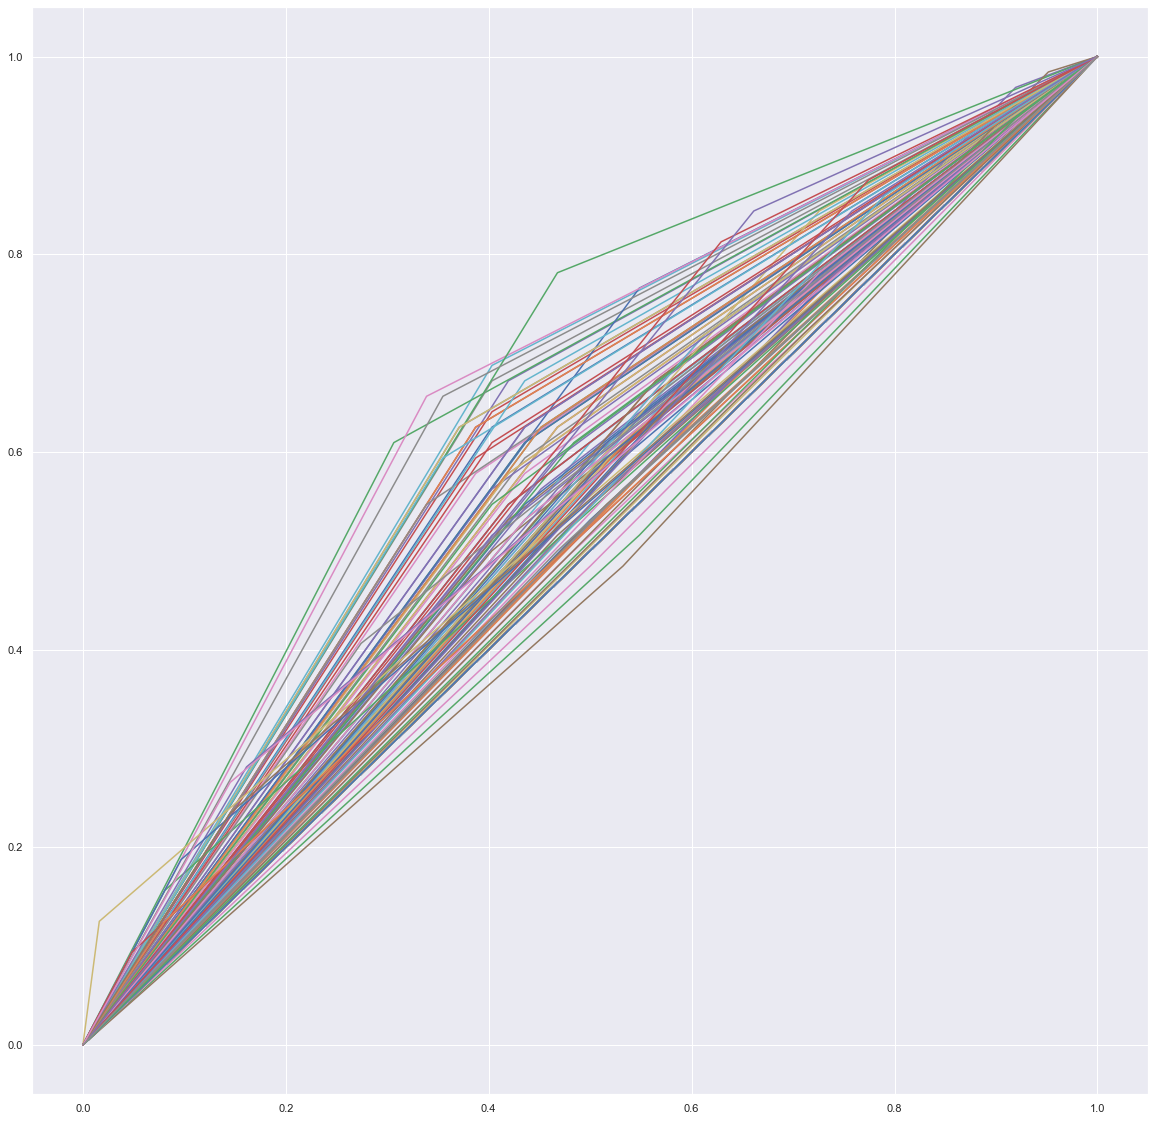

In [284]:
roc_pairs = []
for col in df_pairs.columns:
    clf = LogisticRegression().fit(np.array(df_pairs[col]).reshape(-1, 1), np.array(df_all["Stroke"]))
    y_pred = clf.predict(np.array(df_pairs[col]).reshape(-1, 1))
    fpr, tpr, thresholds = roc_curve(df_all["Stroke"], y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    roc_pairs.append([roc_auc, col])

In [285]:
useful_pairs = []
for i in roc_pairs:
    names = i[1].split("_")
    if names[0] in roc_risk.keys():
        if roc_risk[names[0]] < i[0] and roc_risk[names[1]] < i[0]:
            useful_pairs.append(i)
    if names[0] in roc_vc.keys():
        if roc_vc[names[0]] < i[0] and roc_vc[names[1]] < i[0]:
            useful_pairs.append(i)
len(useful_pairs)

36

In [286]:
useful_pairs = sorted(useful_pairs, key=lambda x: x[0], reverse=True)

In [287]:
useful_pairs[:10]

[[0.6587701612903226, 'MaxDilationByArea_MaxMaxWallThickness'],
 [0.6567540322580645, 'MaxMATXArea_MaxMaxWallThickness'],
 [0.6514616935483871, 'MaxCALCArea_MaxRemodelingRatio'],
 [0.6421370967741935, 'MaxCALCArea_MaxLRNCArea'],
 [0.6343245967741935, 'MaxCALCAreaProp_MaxLRNCArea'],
 [0.6270161290322581, 'CALCVol_MaxDilationByArea'],
 [0.6262600806451613, 'CALCVol_MaxStenosisByDiameter'],
 [0.6194556451612903, 'MaxRemodelingRatio_MaxStenosisByDiameter'],
 [0.6189516129032258, 'MaxCALCArea_MaxStenosisByDiameter'],
 [0.6189516129032258, 'MaxCALCAreaProp_MaxStenosisByDiameter']]

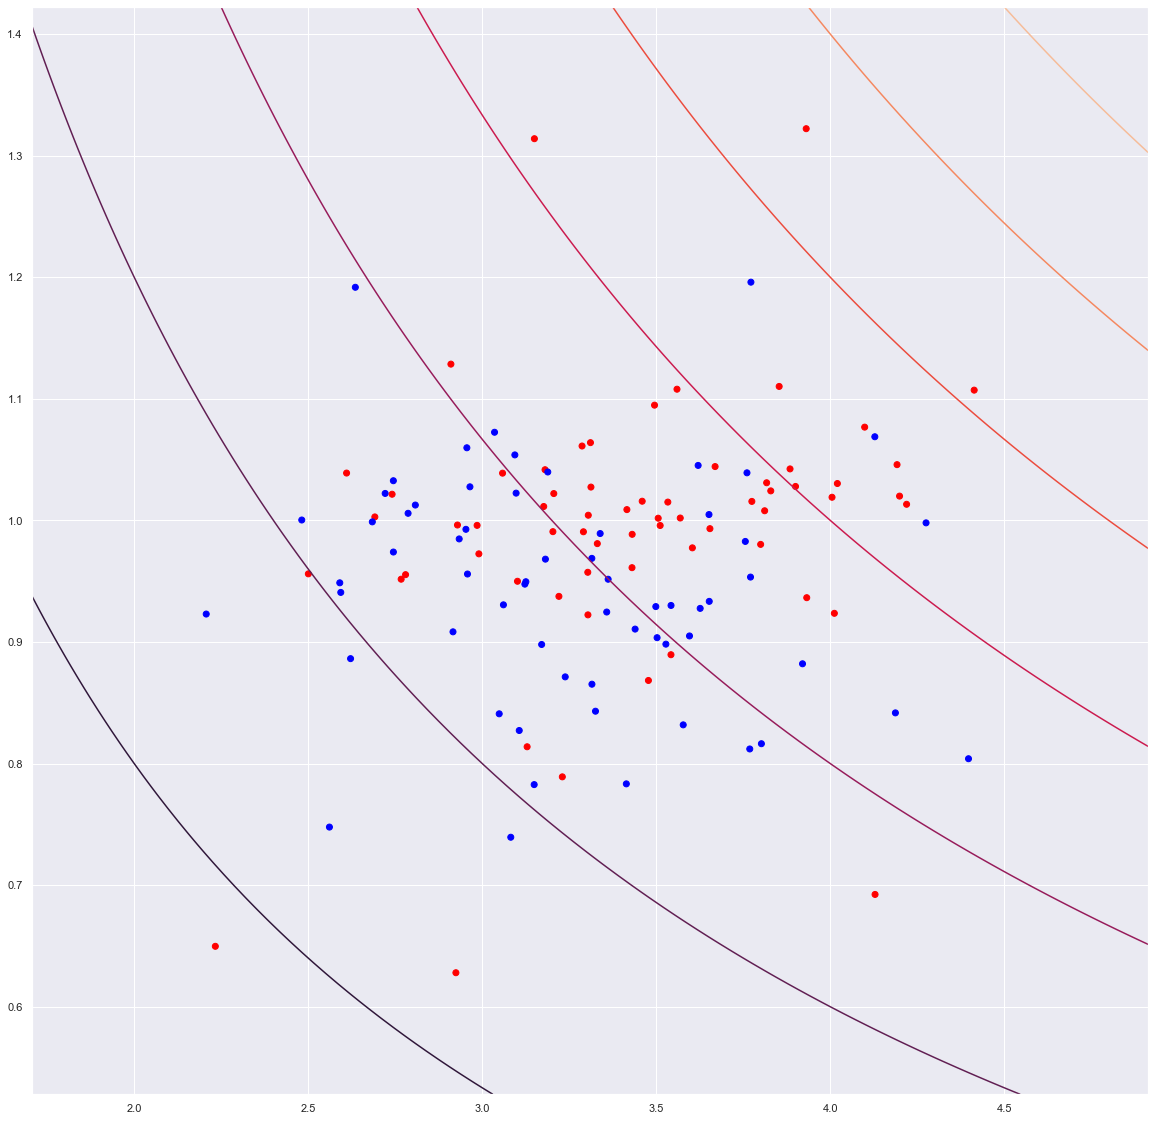

In [288]:
x = np.linspace(df_all["MaxDilationByArea"].min()-.5, df_all["MaxDilationByArea"].max()+.5, 100)
y = np.linspace( df_all["MaxMaxWallThickness"].min()-.1,  df_all["MaxMaxWallThickness"].max()+.1, 100)
X, Y = np.meshgrid(x, y)
Z = X*Y
plt.contour(X, Y, Z)
colors = {1: "red", 0: "blue"}
plt.scatter(df_all["MaxDilationByArea"], df_all["MaxMaxWallThickness"], c =df_all["Stroke"].map(colors))

In [289]:
#creating the selected features
selected_features = []
for i in roc_vc.keys():
    if roc_vc[i] > .6:
        selected_features.append(i)
for i in roc_risk.keys():
    if roc_risk[i] > .6:
        selected_features.append(i)
selected_features.append("Stroke")
df_sel = pd.DataFrame(df_all[selected_features])
useful_pairs_name =  [item[1] for item in useful_pairs]
df_sel[useful_pairs_name] = df_pairs[useful_pairs_name]

In [290]:
cor_matrix = df_sel.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] >= 0.9)]
df_sel.drop(to_drop, axis=1, inplace=True)


In [291]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(df_sel.drop(['Stroke'], axis = 1), df_sel["Stroke"], test_size=0.3,shuffle = False)
X_train.head()
clf = LogisticRegression(max_iter=2000)


In [292]:
selector = RFE(clf, n_features_to_select=10, step=1)
selector = selector.fit(X_train, y_train)
X_train = selector.transform(X_train)
X_test = selector.transform(X_test)

In [293]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

scores = cross_val_score(clf, X_train, y_train, cv=10, scoring='f1_macro')
print(scores.mean(), scores.std(), scores)
clf.fit(X_train, y_train)


0.6382475857475858 0.15676793198851122 [0.75       0.88311688 0.55       0.30769231 0.66666667 0.775
 0.55       0.66666667 0.5        0.73333333]


LogisticRegression(max_iter=2000)

In [294]:
accuracy_score(y_test, clf.predict(X_test))

0.6842105263157895

In [295]:
fpr, tpr, thresholds = roc_curve(y_train, clf.predict(X_train))
roc_auc = auc(fpr, tpr)
print(roc_auc)

0.7045454545454545


In [296]:
fpr, tpr, thresholds = roc_curve(y_test, clf.predict(X_test))
roc_auc = auc(fpr, tpr)
print(roc_auc)

0.6861111111111111
